In [2]:
import pandas as pd #lectura de datos
import numpy as np # biblioteca con operaciones matemáticas y algebra lineal

#viz y plots bonitos
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams[u'figure.figsize'] = (16,12)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'}
plt.rcParams.update(params)

# ML
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error,mean_absolute_error,
                             r2_score,explained_variance_score, accuracy_score)
from sklearn import linear_model
from sklearn import model_selection

%matplotlib inline

# Regresión Lineal

Un modelo lineal genera predicciones por simple computo de la suma ponderada de términos de las variables de entrada, más el intercepto, más un término de error (*bias term*).

$f(X) = \beta_0 + \sum X_j\beta_j + \epsilon$


Una regresión estudia la relación entre variables. 

Ejemplos clásicos son:

+ Física (2a Ley de Newton simplificada):

    $ F = ma $

+ Economía (función de oferta):

    $P = 4c - 200$ 
      
Donde P es el precio y c la cantidad de objetos que se venden.
      
+ Matematicas (ecuación de la recta):  

    $f(x) = ax +b$

La idea de la regresión es tener un conjunto de datos de entrada y explicar o describir los datos de salida como una combinación lineal de los datos de entrada.

$X^T=(X_1,X_2,...,X_n)$

Obteniendo que:

$Y = X^T \beta $

El modelo que se busca describir es de la forma:

$f(X) = \beta_0 + \sum X_j\beta_j + \epsilon$

El metodo para estimar las $\beta$'s más comun es el ajuste por mínimos cuadrados.

Este método utiliza los residuos, donde los residuos se definen como: $e_i = y_i - \hat{y_i}$, siendo una especie de distancia que indica que tan alejado o cercano estás del punto a estimar.

En este caso se busca minimizar el error cuadrático o también conocido como la suma de los residuos:

$ RSS(\beta) = \sum [y_i - f(x_i)]^2$                                        (1)

Lo que se hace es sustituir la expresión que de $f(x)$ que depende de las $\beta 's$ para minimizar la ecuación y tratar de encontrar las mejores $\beta 's$ para describir Y.

Si definimos la suma de los residuos cuadráticos obtendríamos (1) y minimizando esta ecuación y sustituyendo los coeficientes obtenemos:
 
 $\hat{\beta}_1 = \frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{\sum{(x_i-\bar{x})^2}}$
 
 $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$
 
Donde $\bar{x}$ y $\bar{y}$ son los valores promedios.

<img src='Imagenes/rl_2.png'/>
Como observamos los residuos sería las lineas grises entre cada punto y la linea de tendencia.

<img src='Imagenes/rl.png'/>

In [3]:
# Lectura de datos
df = pd.read_csv('Datos/genero_altura_peso.csv')
X = df.altura.values.reshape(-1, 1) # reshape para generar un vector
y = df.peso.values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genero  237 non-null    object 
 1   edad    237 non-null    int64  
 2   altura  237 non-null    float64
 3   peso    237 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.5+ KB


In [5]:
df.head()

,genero,edad,altura,peso
0,f,143,56.3,85.0
1,f,191,62.5,112.5
2,f,160,62.0,94.5
3,f,157,64.5,123.5
4,f,191,65.3,107.0


In [6]:
df['edad_b'] = df.edad/12

In [7]:
df = pd.get_dummies(df,
               columns=['genero'],
               drop_first=True)

In [8]:
df.head()

,edad,altura,peso,edad_b,genero_m
0,143,56.3,85.0,11.916667,0
1,191,62.5,112.5,15.916667,0
2,160,62.0,94.5,13.333333,0
3,157,64.5,123.5,13.083333,0
4,191,65.3,107.0,15.916667,0


# *Dataset* altura y peso

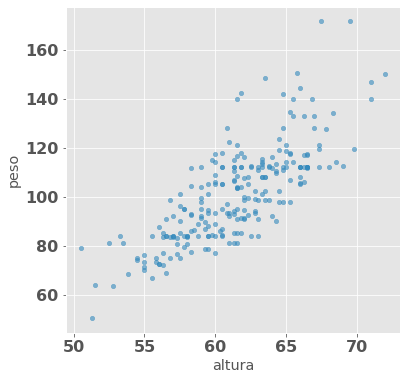

In [9]:
# cómo se ven los datos.
df[['altura','peso']].plot.scatter(x='altura',y='peso', 
                                   alpha=0.6, figsize=(6,6));

In [10]:
df[['altura','peso']].corr()

,altura,peso
altura,1.000000,0.774876
peso,0.774876,1.000000


In [11]:
df[['altura','peso']].describe()

,altura,peso
count,237.000000,237.000000
mean,61.364557,101.308017
std,3.945402,19.440698
min,50.500000,50.500000
25%,58.800000,85.000000
50%,61.500000,101.000000
75%,64.300000,112.000000
max,72.000000,171.500000


### Machine Learning

In [12]:
df.columns

Index(['edad', 'altura', 'peso', 'edad_b', 'genero_m'], dtype='object')

In [13]:
X = df[['altura', 'edad_b', 'genero_m']]
y = df['peso']

In [14]:
ls = LinearRegression()

ls.fit(X, y)

y_hat = ls.predict(X)

In [15]:
X

,altura,edad_b,genero_m
0,56.3,11.916667,0
1,62.5,15.916667,0
2,62.0,13.333333,0
3,64.5,13.083333,0
4,65.3,15.916667,0
...,...,...,...
232,55.0,12.166667,1
233,64.8,12.750000,1
234,63.8,14.833333,1
235,55.0,11.833333,1


In [19]:
ls.predict([['55', '12.8', '1']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

### Listo ya acabaste :v

<AxesSubplot:xlabel='altura', ylabel='peso'>

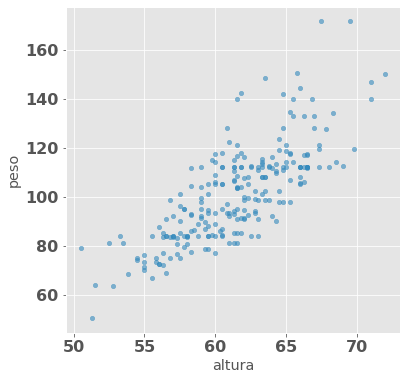

In [20]:
df[['altura','peso']].plot.scatter(x='altura',y='peso', 
                                   alpha=0.6, figsize=(6,6))
# plt.plot(X['altura'],sorted(y_hat))

1. Se evalua tu modelo

In [21]:
print('r"2 % 1.3f' % r2_score(y,y_hat))

r"2  0.631


In [22]:
# En promedio me equivoco más o menos
print('RMSE % 1.3f' %np.sqrt(mean_squared_error(y,y_hat)))

RMSE  11.792


2. Se interpreta tu modelo

In [23]:
print('Intercepto % 1.2f' % ls.intercept_)

Intercepto -128.21


In [24]:
pd.DataFrame(ls.coef_,X.columns)

,0
altura,3.104755
edad_b,2.858920
genero_m,-0.337506


# Regresion multilineal

*Dataset melbourne-housing-market:*

* Suburb: Suburb

* Address: Address

* Rooms: Number of rooms

* Price: Price in Australian dollars

* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

* SellerG: Real Estate Agent

* Date: Date sold

* Distance: Distance from CBD in Kilometres

* Regionname: General Region (West, North West, North, North east ...etc)

* Propertycount: Number of properties that exist in the suburb.

* Bedroom2 : Scraped # of Bedrooms (from different source)

* Bathroom: Number of Bathrooms

* Car: Number of carspots

* Landsize: Land Size in Metres

* BuildingArea: Building Size in Metres

* YearBuilt: Year the house was built

* CouncilArea: Governing council for the area

* Lattitude: Self explanitory

* Longtitude: Self explanitory

El objetico es estimar el precio de una casa.

In [25]:
df = pd.read_csv('Datos/Melbourne_housing_FULL.csv')
df.columns = df.columns.str.lower()
df.dropna(inplace = True)

In [26]:
y = df.price

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         8887 non-null   object 
 1   address        8887 non-null   object 
 2   rooms          8887 non-null   int64  
 3   type           8887 non-null   object 
 4   price          8887 non-null   float64
 5   method         8887 non-null   object 
 6   sellerg        8887 non-null   object 
 7   date           8887 non-null   object 
 8   distance       8887 non-null   float64
 9   postcode       8887 non-null   float64
 10  bedroom2       8887 non-null   float64
 11  bathroom       8887 non-null   float64
 12  car            8887 non-null   float64
 13  landsize       8887 non-null   float64
 14  buildingarea   8887 non-null   float64
 15  yearbuilt      8887 non-null   float64
 16  councilarea    8887 non-null   object 
 17  lattitude      8887 non-null   float64
 18  longtit

* Suburb: Suburb
* Address: Address
* Rooms: Number of rooms
* Price: Price in Australian dollars
* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* SellerG: Real Estate Agent
* Date: Date sold
* Distance: Distance from CBD in Kilometres
* Regionname: General Region (West, North West, North, North east ...etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size in Metres
* BuildingArea: Building Size in Metres
* YearBuilt: Year the house was built
* CouncilArea: Governing council for the area
* Lattitude: Self explanitory
* Longtitude: Self explanitory

In [28]:
X = df[['distance', 'car', 'rooms',
       'landsize', 'buildingarea', 'yearbuilt',
       'propertycount']]

In [29]:
X.mean()

distance           11.199887
car                 1.692247
rooms               3.098909
landsize          523.480365
buildingarea      149.309477
yearbuilt        1965.753348
propertycount    7475.940137
dtype: float64

In [30]:
X.std()

distance            6.813402
car                 0.975464
rooms               0.963786
landsize         1061.324228
buildingarea       87.925580
yearbuilt          37.040876
propertycount    4375.024364
dtype: float64

Estandarizando variables:

In [31]:
X_std = (X - X.mean())/X.std()

# Machine Learining

In [32]:
ls_std = linear_model.LinearRegression()
ls_std.fit(X_std,y)

LinearRegression()

### Listo

In [33]:
ls_std.coef_

array([-213551.50663731,   57550.35635983,  216109.47810834,
         27286.12851797,  231889.74202213, -170545.74448859,
         -4059.94102794])

In [34]:
print('Intercepto % 1.2f' % ls_std.intercept_)
coefs = pd.DataFrame(index = X.columns, data = ls_std.coef_,columns=['coeficientes'])
coefs

Intercepto  1092901.63


,coeficientes
distance,-213551.506637
car,57550.356360
rooms,216109.478108
landsize,27286.128518
buildingarea,231889.742022
yearbuilt,-170545.744489
propertycount,-4059.941028


In [35]:
y_hat = ls_std.predict(X_std)

In [36]:
y.mean()

1092901.6288961405

In [37]:
print('RMSE: % 1.f' %np.sqrt(mean_squared_error(y,y_hat)))
print('r"2: % 1.3f' % r2_score(y,y_hat))

RMSE:  482224
r"2:  0.496


In [38]:
print('RMSE: % 1.f' %np.sqrt(mean_squared_error(y,y_hat)))
print('r"2: % 1.3f' % r2_score(y,y_hat))

RMSE:  482224
r"2:  0.496


Costo promedio: 1092902


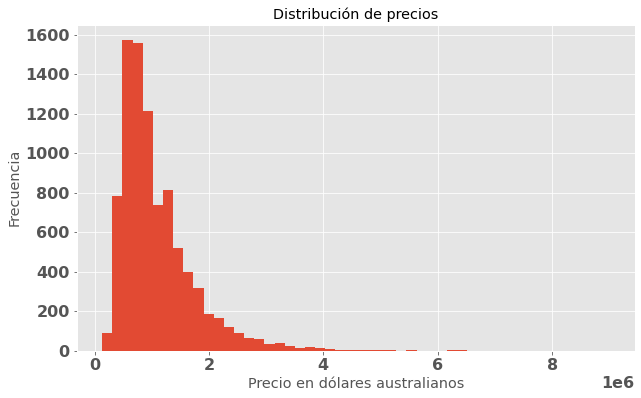

In [39]:
print('Costo promedio: %1.f' % y.mean())
(df.price).hist(bins=50,figsize=(10,6))
plt.title('Distribución de precios')
plt.xlabel('Precio en dólares australianos')
plt.ylabel('Frecuencia');

In [40]:
df.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude',
       'longtitude', 'regionname', 'propertycount'],
      dtype='object')

<AxesSubplot:title={'center':'Valor de los coeficientes'}>

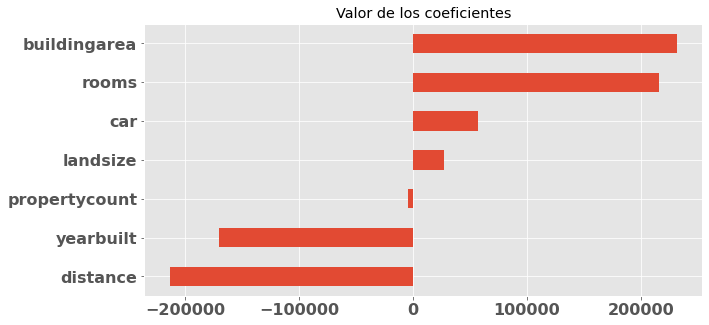

In [41]:
coefs.sort_values('coeficientes').plot.barh(legend=False,
                                            title='Valor de los coeficientes', figsize=(10,5))

# Regresion polinomial

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pf = PolynomialFeatures(2) # revisar ayuda !!!
X_poli = pf.fit_transform(X)

In [44]:
X_poli.shape

(8887, 36)

In [45]:
ls_poli = linear_model.LinearRegression()
ls_poli.fit(X_poli,y)

LinearRegression()

In [46]:
# Nombres de las variables
for i in zip(['x0','x1','x2','x3','x4','x5','x6'], X.columns):
    print(i)

('x0', 'distance')
('x1', 'car')
('x2', 'rooms')
('x3', 'landsize')
('x4', 'buildingarea')
('x5', 'yearbuilt')
('x6', 'propertycount')


In [47]:
print('Intercepto % 1.2f' % ls_poli.intercept_)

coefs = pd.DataFrame(index = pf.get_feature_names(), 
                     data = ls_poli.coef_,columns=['coeficientes'])
coefs

Intercepto -9451079.25


,coeficientes
1,-2.212691e-02
x0,-1.650558e+05
x1,8.798762e+05
x2,2.371337e+06
x3,9.613887e+02
x4,-8.965440e+03
x5,1.228526e+04
x6,-2.128083e+02
x0^2,1.106176e+03
x0 x1,-1.805762e+03


<AxesSubplot:>

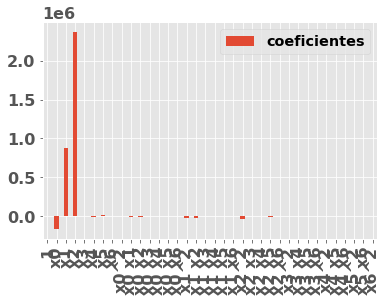

In [48]:
coefs.plot.bar()

In [49]:
y_hat = ls_poli.predict(X_poli)

In [50]:
print('RMSE: % 1.f' % np.sqrt(mean_squared_error(y,y_hat)))
print('r"2: % 1.3f' % r2_score(y,y_hat))

RMSE:  429036
r"2:  0.601


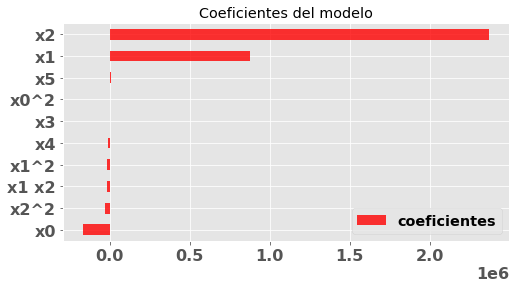

In [51]:
coefs.sort_values('coeficientes',inplace=True)
imp_coef = pd.concat([coefs.head(5), coefs.tail(5)])
imp_coef.plot(kind = "barh", color='r',alpha=0.8,figsize = (8,4))
plt.title("Coeficientes del modelo");